In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
 
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import  train_test_split
 
import tensorflow as tf
from tensorflow.keras import regularizers
import pandas as pd
from random import seed
from random import random
import tsfresh

In [2]:
data = pd.read_excel('crude oil dataset/tsfresh1 - Copy.xlsx')
#data.drop(data.columns[[2]], axis=1, inplace=True)
#data.drop(data.columns[[0]], axis=1, inplace=True)
print(data.head())

y = data.real
data.drop(data.columns[[0]], axis=1, inplace=True)

x = np.array(data)
#x = x.transpose()
y = np.array(y)

x = x.tolist()
df = pd.DataFrame()
for i, ts in enumerate(x):
    data = [[y, i] for y in ts]
    df = df.append(data, ignore_index=True)
df.columns = ['value', 'id']


from tsfresh.utilities.dataframe_functions import roll_time_series
#df_rolled = roll_time_series(df, column_id="id",max_timeshift=6,min_timeshift=2)
#,column_sort=None, column_kind=None,rolling_direction=1, max_timeshift=5, min_timeshift=4

tf=tsfresh.extract_features(df, column_id='id')

from tsfresh.utilities.dataframe_functions import impute
impute(tf)
tf.columns

      Month      t       real
0  Jan 2017  53.31  51.675000
1  Feb 2017  54.58  50.658333
2  Mar 2017  54.87  50.130000
3  Apr 2017  51.59  50.890000
4  May 2017  52.31  51.756667


C:\Users\asus\AppData\Local\Temp\ipykernel_10936\3184021065.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 16/16 [00:06<00:00,  2.65it/s]
C:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['value__mean_second_derivative_central' 'value__skewness'
 'value__kurtosis' 'value__sample_entropy' 'value__autocorrelation__lag_2'
 'value__autocorrelation__lag_3' 'value__autocorrelation__lag_4'
 'value__autocorrelation__lag_5' 'value__autocorrelation__lag_6'
 'value__autocorrelation__lag_7' 'value__autocorrelation__lag_8'
 'value__autocorrelation__lag_9' 'value__partial_autocorrelation__lag_0'
 'value__partial_autocorrelation__lag_1'
 'value__partial_autocorrelation__lag_2'
 'value_

Index(['value__variance_larger_than_standard_deviation',
       'value__has_duplicate_max', 'value__has_duplicate_min',
       'value__has_duplicate', 'value__sum_values', 'value__abs_energy',
       'value__mean_abs_change', 'value__mean_change',
       'value__mean_second_derivative_central', 'value__median',
       ...
       'value__permutation_entropy__dimension_6__tau_1',
       'value__permutation_entropy__dimension_7__tau_1',
       'value__query_similarity_count__query_None__threshold_0.0',
       'value__matrix_profile__feature_"min"__threshold_0.98',
       'value__matrix_profile__feature_"max"__threshold_0.98',
       'value__matrix_profile__feature_"mean"__threshold_0.98',
       'value__matrix_profile__feature_"median"__threshold_0.98',
       'value__matrix_profile__feature_"25"__threshold_0.98',
       'value__matrix_profile__feature_"75"__threshold_0.98',
       'value__mean_n_absolute_max__number_of_maxima_7'],
      dtype='object', length=789)

In [3]:
from tsfresh import select_features
filtered_features = select_features(tf, y)
tf = filtered_features

In [4]:
y = pd.DataFrame(y)
tf = pd.concat([tf, y], axis=1)
tf.columns

Index([                                            'value__quantile__q_0.3',
                                                   'value__quantile__q_0.9',
                                                   'value__quantile__q_0.8',
                                                   'value__quantile__q_0.4',
                                                   'value__quantile__q_0.1',
                                                           'value__minimum',
                                                        'value__sum_values',
                                                   'value__quantile__q_0.7',
                                                   'value__quantile__q_0.2',
             'value__cwt_coefficients__coeff_1__w_2__widths_(2, 5, 10, 20)',
                                                           'value__maximum',
                                                  'value__absolute_maximum',
                                                  'value__root_mean_square',

In [5]:
values = tf.values
values = values.astype('float32')

print(values)
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

tf = pd.DataFrame(scaled)


[[ 52.1655     53.1465     52.983     ...   1.635      -1.635
   51.675    ]
 [ 51.834835   54.18783    53.795666  ...   3.9216666  -3.9216666
   50.658333 ]
 [ 51.552      54.396      53.922     ...   4.74       -4.74
   50.13     ]
 ...
 [ 86.384      97.052      95.274     ... -17.78       17.78
   98.83     ]
 [ 83.995     103.645     100.37      ... -32.75       32.75
  106.92     ]
 [ 93.904     108.692     106.22733   ... -24.646667   24.646667
  111.15667  ]]


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.395983,0.238613,0.249050,0.365654,0.457501,0.488698,0.335607,0.276343,0.426597,0.335607,...,0.512696,0.512696,0.512696,0.252456,1.0,0.428520,0.428520,0.571480,0.428520,0.222326
1,0.391198,0.252887,0.260512,0.364185,0.445989,0.473776,0.337423,0.284639,0.418464,0.337423,...,0.531337,0.531337,0.531337,0.252456,1.0,0.390516,0.390516,0.609484,0.390516,0.209034
2,0.387104,0.255740,0.262294,0.361290,0.439466,0.466021,0.335715,0.285271,0.413162,0.335715,...,0.535594,0.535594,0.535594,0.252456,1.0,0.376915,0.376915,0.623085,0.376915,0.202127
3,0.380563,0.216317,0.227429,0.348960,0.444667,0.477176,0.317650,0.255895,0.412464,0.317650,...,0.487450,0.487450,0.487450,0.252456,1.0,0.444060,0.444060,0.555940,0.444060,0.212063
4,0.392469,0.226388,0.237998,0.360598,0.457113,0.489897,0.329024,0.266747,0.424639,0.329024,...,0.498018,0.498019,0.498018,0.252456,1.0,0.446497,0.446497,0.553503,0.446497,0.223394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.786133,0.721800,0.726724,0.773887,0.810975,0.823573,0.761753,0.737822,0.798496,0.761753,...,0.823573,0.823573,0.823573,0.037180,1.0,0.712501,0.712501,0.287499,0.712501,0.722631
58,0.893034,0.777466,0.791818,0.872304,0.935083,0.956407,0.851766,0.811258,0.913960,0.851766,...,0.956407,0.956407,0.956407,0.000000,1.0,0.620371,0.620371,0.379629,0.620371,0.768478
59,0.891175,0.840445,0.845516,0.881791,0.910207,0.919859,0.872496,0.854160,0.900646,0.872495,...,0.919859,0.919859,0.919859,0.000000,1.0,0.751198,0.751198,0.248802,0.751198,0.838839
60,0.856602,0.930818,0.917389,0.868943,0.831570,0.818876,0.881169,0.905285,0.844145,0.881169,...,0.818876,0.818876,0.818876,0.796551,1.0,1.000000,1.000000,0.000000,1.000000,0.944609


In [7]:
values = tf.values
n_train = 47
train = values[:n_train]
val = values[n_train:n_train+12]
test = values[n_train+12:]
trainX,trainY = train[:,:-1],train[:,-1]
testX,testY = test[:,:-1],test[:,-1]

valX,valY=val[:,:-1],val[:,-1]

In [8]:
print(trainX.shape,trainY.shape,testX.shape,testY.shape)

(47, 33) (47,) (3, 33) (3,)


In [9]:

trainX = trainX.reshape(trainX.shape[0],1,trainX.shape[1])
testX = testX.reshape(testX.shape[0],1,testX.shape[1])
valX = valX.reshape(valX.shape[0],1,valX.shape[1])

In [10]:
import tensorflow as tf

model = tf.keras.Sequential([
tf.keras.layers.Dense(32, activation='relu',input_shape=(trainX.shape[1],trainX.shape[2])),
tf.keras.layers.Dense(16, activation='relu'),
tf.keras.layers.Dense(8, activation='relu'),
tf.keras.layers.Dense(4, activation='relu'),
tf.keras.layers.Dense(1)
])
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 32)             1088      
                                                                 
 dense_1 (Dense)             (None, 1, 16)             528       
                                                                 
 dense_2 (Dense)             (None, 1, 8)              136       
                                                                 
 dense_3 (Dense)             (None, 1, 4)              36        
                                                                 
 dense_4 (Dense)             (None, 1, 1)              5         
                                                                 
Total params: 1,793
Trainable params: 1,793
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(trainX,trainY, validation_data=(valX,valY), epochs=1000, verbose=2)

Epoch 1/1000
2/2 - 2s - loss: 0.3038 - val_loss: 0.5147 - 2s/epoch - 1s/step
Epoch 2/1000
2/2 - 0s - loss: 0.2957 - val_loss: 0.5044 - 21ms/epoch - 11ms/step
Epoch 3/1000
2/2 - 0s - loss: 0.2872 - val_loss: 0.4942 - 22ms/epoch - 11ms/step
Epoch 4/1000
2/2 - 0s - loss: 0.2783 - val_loss: 0.4830 - 21ms/epoch - 11ms/step
Epoch 5/1000
2/2 - 0s - loss: 0.2704 - val_loss: 0.4710 - 23ms/epoch - 11ms/step
Epoch 6/1000
2/2 - 0s - loss: 0.2618 - val_loss: 0.4569 - 21ms/epoch - 11ms/step
Epoch 7/1000
2/2 - 0s - loss: 0.2527 - val_loss: 0.4407 - 21ms/epoch - 11ms/step
Epoch 8/1000
2/2 - 0s - loss: 0.2433 - val_loss: 0.4233 - 30ms/epoch - 15ms/step
Epoch 9/1000
2/2 - 0s - loss: 0.2341 - val_loss: 0.4041 - 21ms/epoch - 10ms/step
Epoch 10/1000
2/2 - 0s - loss: 0.2235 - val_loss: 0.3867 - 22ms/epoch - 11ms/step
Epoch 11/1000
2/2 - 0s - loss: 0.2122 - val_loss: 0.3703 - 21ms/epoch - 10ms/step
Epoch 12/1000
2/2 - 0s - loss: 0.2025 - val_loss: 0.3543 - 21ms/epoch - 11ms/step
Epoch 13/1000
2/2 - 0s - loss

2/2 - 0s - loss: 0.1245 - val_loss: 0.1645 - 20ms/epoch - 10ms/step
Epoch 102/1000
2/2 - 0s - loss: 0.1253 - val_loss: 0.1622 - 20ms/epoch - 10ms/step
Epoch 103/1000
2/2 - 0s - loss: 0.1246 - val_loss: 0.1609 - 21ms/epoch - 10ms/step
Epoch 104/1000
2/2 - 0s - loss: 0.1248 - val_loss: 0.1594 - 21ms/epoch - 10ms/step
Epoch 105/1000
2/2 - 0s - loss: 0.1245 - val_loss: 0.1578 - 20ms/epoch - 10ms/step
Epoch 106/1000
2/2 - 0s - loss: 0.1248 - val_loss: 0.1578 - 19ms/epoch - 9ms/step
Epoch 107/1000
2/2 - 0s - loss: 0.1248 - val_loss: 0.1585 - 21ms/epoch - 10ms/step
Epoch 108/1000
2/2 - 0s - loss: 0.1236 - val_loss: 0.1594 - 19ms/epoch - 9ms/step
Epoch 109/1000
2/2 - 0s - loss: 0.1243 - val_loss: 0.1616 - 19ms/epoch - 10ms/step
Epoch 110/1000
2/2 - 0s - loss: 0.1244 - val_loss: 0.1622 - 20ms/epoch - 10ms/step
Epoch 111/1000
2/2 - 0s - loss: 0.1247 - val_loss: 0.1636 - 20ms/epoch - 10ms/step
Epoch 112/1000
2/2 - 0s - loss: 0.1246 - val_loss: 0.1639 - 21ms/epoch - 11ms/step
Epoch 113/1000
2/2 - 

Epoch 200/1000
2/2 - 0s - loss: 0.1237 - val_loss: 0.1648 - 20ms/epoch - 10ms/step
Epoch 201/1000
2/2 - 0s - loss: 0.1237 - val_loss: 0.1629 - 20ms/epoch - 10ms/step
Epoch 202/1000
2/2 - 0s - loss: 0.1241 - val_loss: 0.1615 - 21ms/epoch - 11ms/step
Epoch 203/1000
2/2 - 0s - loss: 0.1236 - val_loss: 0.1629 - 19ms/epoch - 10ms/step
Epoch 204/1000
2/2 - 0s - loss: 0.1238 - val_loss: 0.1643 - 20ms/epoch - 10ms/step
Epoch 205/1000
2/2 - 0s - loss: 0.1237 - val_loss: 0.1670 - 20ms/epoch - 10ms/step
Epoch 206/1000
2/2 - 0s - loss: 0.1236 - val_loss: 0.1698 - 20ms/epoch - 10ms/step
Epoch 207/1000
2/2 - 0s - loss: 0.1219 - val_loss: 0.1718 - 19ms/epoch - 10ms/step
Epoch 208/1000
2/2 - 0s - loss: 0.1239 - val_loss: 0.1742 - 19ms/epoch - 10ms/step
Epoch 209/1000
2/2 - 0s - loss: 0.1242 - val_loss: 0.1742 - 18ms/epoch - 9ms/step
Epoch 210/1000
2/2 - 0s - loss: 0.1232 - val_loss: 0.1729 - 21ms/epoch - 10ms/step
Epoch 211/1000
2/2 - 0s - loss: 0.1233 - val_loss: 0.1674 - 20ms/epoch - 10ms/step
Epoch

Epoch 299/1000
2/2 - 0s - loss: 0.1239 - val_loss: 0.1581 - 20ms/epoch - 10ms/step
Epoch 300/1000
2/2 - 0s - loss: 0.1239 - val_loss: 0.1605 - 20ms/epoch - 10ms/step
Epoch 301/1000
2/2 - 0s - loss: 0.1235 - val_loss: 0.1627 - 21ms/epoch - 11ms/step
Epoch 302/1000
2/2 - 0s - loss: 0.1237 - val_loss: 0.1666 - 21ms/epoch - 10ms/step
Epoch 303/1000
2/2 - 0s - loss: 0.1239 - val_loss: 0.1690 - 20ms/epoch - 10ms/step
Epoch 304/1000
2/2 - 0s - loss: 0.1238 - val_loss: 0.1693 - 20ms/epoch - 10ms/step
Epoch 305/1000
2/2 - 0s - loss: 0.1237 - val_loss: 0.1689 - 21ms/epoch - 11ms/step
Epoch 306/1000
2/2 - 0s - loss: 0.1233 - val_loss: 0.1675 - 20ms/epoch - 10ms/step
Epoch 307/1000
2/2 - 0s - loss: 0.1235 - val_loss: 0.1642 - 20ms/epoch - 10ms/step
Epoch 308/1000
2/2 - 0s - loss: 0.1237 - val_loss: 0.1627 - 20ms/epoch - 10ms/step
Epoch 309/1000
2/2 - 0s - loss: 0.1231 - val_loss: 0.1634 - 21ms/epoch - 10ms/step
Epoch 310/1000
2/2 - 0s - loss: 0.1236 - val_loss: 0.1663 - 22ms/epoch - 11ms/step
Epoc

Epoch 398/1000
2/2 - 0s - loss: 0.1240 - val_loss: 0.1729 - 20ms/epoch - 10ms/step
Epoch 399/1000
2/2 - 0s - loss: 0.1234 - val_loss: 0.1708 - 19ms/epoch - 10ms/step
Epoch 400/1000
2/2 - 0s - loss: 0.1237 - val_loss: 0.1666 - 20ms/epoch - 10ms/step
Epoch 401/1000
2/2 - 0s - loss: 0.1232 - val_loss: 0.1633 - 20ms/epoch - 10ms/step
Epoch 402/1000
2/2 - 0s - loss: 0.1234 - val_loss: 0.1592 - 22ms/epoch - 11ms/step
Epoch 403/1000
2/2 - 0s - loss: 0.1238 - val_loss: 0.1562 - 20ms/epoch - 10ms/step
Epoch 404/1000
2/2 - 0s - loss: 0.1246 - val_loss: 0.1563 - 20ms/epoch - 10ms/step
Epoch 405/1000
2/2 - 0s - loss: 0.1244 - val_loss: 0.1613 - 20ms/epoch - 10ms/step
Epoch 406/1000
2/2 - 0s - loss: 0.1236 - val_loss: 0.1664 - 20ms/epoch - 10ms/step
Epoch 407/1000
2/2 - 0s - loss: 0.1233 - val_loss: 0.1695 - 19ms/epoch - 9ms/step
Epoch 408/1000
2/2 - 0s - loss: 0.1236 - val_loss: 0.1722 - 20ms/epoch - 10ms/step
Epoch 409/1000
2/2 - 0s - loss: 0.1236 - val_loss: 0.1726 - 19ms/epoch - 10ms/step
Epoch

Epoch 497/1000
2/2 - 0s - loss: 0.1233 - val_loss: 0.1681 - 20ms/epoch - 10ms/step
Epoch 498/1000
2/2 - 0s - loss: 0.1234 - val_loss: 0.1699 - 20ms/epoch - 10ms/step
Epoch 499/1000
2/2 - 0s - loss: 0.1235 - val_loss: 0.1715 - 21ms/epoch - 10ms/step
Epoch 500/1000
2/2 - 0s - loss: 0.1235 - val_loss: 0.1716 - 20ms/epoch - 10ms/step
Epoch 501/1000
2/2 - 0s - loss: 0.1234 - val_loss: 0.1711 - 19ms/epoch - 9ms/step
Epoch 502/1000
2/2 - 0s - loss: 0.1235 - val_loss: 0.1689 - 19ms/epoch - 10ms/step
Epoch 503/1000
2/2 - 0s - loss: 0.1234 - val_loss: 0.1666 - 20ms/epoch - 10ms/step
Epoch 504/1000
2/2 - 0s - loss: 0.1236 - val_loss: 0.1640 - 19ms/epoch - 10ms/step
Epoch 505/1000
2/2 - 0s - loss: 0.1234 - val_loss: 0.1640 - 20ms/epoch - 10ms/step
Epoch 506/1000
2/2 - 0s - loss: 0.1234 - val_loss: 0.1661 - 19ms/epoch - 10ms/step
Epoch 507/1000
2/2 - 0s - loss: 0.1228 - val_loss: 0.1685 - 19ms/epoch - 10ms/step
Epoch 508/1000
2/2 - 0s - loss: 0.1234 - val_loss: 0.1716 - 20ms/epoch - 10ms/step
Epoch

Epoch 596/1000
2/2 - 0s - loss: 0.1235 - val_loss: 0.1685 - 21ms/epoch - 10ms/step
Epoch 597/1000
2/2 - 0s - loss: 0.1233 - val_loss: 0.1656 - 20ms/epoch - 10ms/step
Epoch 598/1000
2/2 - 0s - loss: 0.1233 - val_loss: 0.1650 - 21ms/epoch - 11ms/step
Epoch 599/1000
2/2 - 0s - loss: 0.1234 - val_loss: 0.1644 - 20ms/epoch - 10ms/step
Epoch 600/1000
2/2 - 0s - loss: 0.1235 - val_loss: 0.1654 - 21ms/epoch - 10ms/step
Epoch 601/1000
2/2 - 0s - loss: 0.1230 - val_loss: 0.1677 - 19ms/epoch - 9ms/step
Epoch 602/1000
2/2 - 0s - loss: 0.1235 - val_loss: 0.1712 - 19ms/epoch - 10ms/step
Epoch 603/1000
2/2 - 0s - loss: 0.1235 - val_loss: 0.1714 - 19ms/epoch - 10ms/step
Epoch 604/1000
2/2 - 0s - loss: 0.1235 - val_loss: 0.1705 - 19ms/epoch - 9ms/step
Epoch 605/1000
2/2 - 0s - loss: 0.1234 - val_loss: 0.1688 - 20ms/epoch - 10ms/step
Epoch 606/1000
2/2 - 0s - loss: 0.1234 - val_loss: 0.1667 - 20ms/epoch - 10ms/step
Epoch 607/1000
2/2 - 0s - loss: 0.1235 - val_loss: 0.1658 - 20ms/epoch - 10ms/step
Epoch 

Epoch 695/1000
2/2 - 0s - loss: 0.1234 - val_loss: 0.1726 - 20ms/epoch - 10ms/step
Epoch 696/1000
2/2 - 0s - loss: 0.1236 - val_loss: 0.1738 - 21ms/epoch - 10ms/step
Epoch 697/1000
2/2 - 0s - loss: 0.1240 - val_loss: 0.1725 - 20ms/epoch - 10ms/step
Epoch 698/1000
2/2 - 0s - loss: 0.1236 - val_loss: 0.1691 - 20ms/epoch - 10ms/step
Epoch 699/1000
2/2 - 0s - loss: 0.1232 - val_loss: 0.1660 - 20ms/epoch - 10ms/step
Epoch 700/1000
2/2 - 0s - loss: 0.1234 - val_loss: 0.1629 - 19ms/epoch - 10ms/step
Epoch 701/1000
2/2 - 0s - loss: 0.1234 - val_loss: 0.1622 - 20ms/epoch - 10ms/step
Epoch 702/1000
2/2 - 0s - loss: 0.1234 - val_loss: 0.1621 - 19ms/epoch - 10ms/step
Epoch 703/1000
2/2 - 0s - loss: 0.1236 - val_loss: 0.1628 - 19ms/epoch - 10ms/step
Epoch 704/1000
2/2 - 0s - loss: 0.1235 - val_loss: 0.1628 - 20ms/epoch - 10ms/step
Epoch 705/1000
2/2 - 0s - loss: 0.1234 - val_loss: 0.1647 - 21ms/epoch - 11ms/step
Epoch 706/1000
2/2 - 0s - loss: 0.1236 - val_loss: 0.1662 - 22ms/epoch - 11ms/step
Epoc

Epoch 794/1000
2/2 - 0s - loss: 0.1233 - val_loss: 0.1670 - 21ms/epoch - 11ms/step
Epoch 795/1000
2/2 - 0s - loss: 0.1233 - val_loss: 0.1661 - 21ms/epoch - 10ms/step
Epoch 796/1000
2/2 - 0s - loss: 0.1231 - val_loss: 0.1647 - 21ms/epoch - 11ms/step
Epoch 797/1000
2/2 - 0s - loss: 0.1234 - val_loss: 0.1614 - 22ms/epoch - 11ms/step
Epoch 798/1000
2/2 - 0s - loss: 0.1236 - val_loss: 0.1605 - 20ms/epoch - 10ms/step
Epoch 799/1000
2/2 - 0s - loss: 0.1236 - val_loss: 0.1618 - 21ms/epoch - 11ms/step
Epoch 800/1000
2/2 - 0s - loss: 0.1235 - val_loss: 0.1658 - 21ms/epoch - 11ms/step
Epoch 801/1000
2/2 - 0s - loss: 0.1233 - val_loss: 0.1685 - 21ms/epoch - 11ms/step
Epoch 802/1000
2/2 - 0s - loss: 0.1233 - val_loss: 0.1703 - 23ms/epoch - 12ms/step
Epoch 803/1000
2/2 - 0s - loss: 0.1234 - val_loss: 0.1708 - 22ms/epoch - 11ms/step
Epoch 804/1000
2/2 - 0s - loss: 0.1234 - val_loss: 0.1688 - 22ms/epoch - 11ms/step
Epoch 805/1000
2/2 - 0s - loss: 0.1233 - val_loss: 0.1672 - 20ms/epoch - 10ms/step
Epoc

Epoch 893/1000
2/2 - 0s - loss: 0.1236 - val_loss: 0.1726 - 22ms/epoch - 11ms/step
Epoch 894/1000
2/2 - 0s - loss: 0.1233 - val_loss: 0.1679 - 21ms/epoch - 10ms/step
Epoch 895/1000
2/2 - 0s - loss: 0.1231 - val_loss: 0.1626 - 20ms/epoch - 10ms/step
Epoch 896/1000
2/2 - 0s - loss: 0.1236 - val_loss: 0.1589 - 21ms/epoch - 11ms/step
Epoch 897/1000
2/2 - 0s - loss: 0.1239 - val_loss: 0.1588 - 21ms/epoch - 10ms/step
Epoch 898/1000
2/2 - 0s - loss: 0.1236 - val_loss: 0.1617 - 21ms/epoch - 10ms/step
Epoch 899/1000
2/2 - 0s - loss: 0.1237 - val_loss: 0.1636 - 21ms/epoch - 10ms/step
Epoch 900/1000
2/2 - 0s - loss: 0.1232 - val_loss: 0.1644 - 21ms/epoch - 10ms/step
Epoch 901/1000
2/2 - 0s - loss: 0.1234 - val_loss: 0.1673 - 21ms/epoch - 11ms/step
Epoch 902/1000
2/2 - 0s - loss: 0.1234 - val_loss: 0.1685 - 22ms/epoch - 11ms/step
Epoch 903/1000
2/2 - 0s - loss: 0.1234 - val_loss: 0.1694 - 21ms/epoch - 11ms/step
Epoch 904/1000
2/2 - 0s - loss: 0.1239 - val_loss: 0.1684 - 21ms/epoch - 11ms/step
Epoc

Epoch 992/1000
2/2 - 0s - loss: 0.1233 - val_loss: 0.1674 - 22ms/epoch - 11ms/step
Epoch 993/1000
2/2 - 0s - loss: 0.1233 - val_loss: 0.1657 - 20ms/epoch - 10ms/step
Epoch 994/1000
2/2 - 0s - loss: 0.1231 - val_loss: 0.1647 - 22ms/epoch - 11ms/step
Epoch 995/1000
2/2 - 0s - loss: 0.1236 - val_loss: 0.1635 - 22ms/epoch - 11ms/step
Epoch 996/1000
2/2 - 0s - loss: 0.1234 - val_loss: 0.1648 - 20ms/epoch - 10ms/step
Epoch 997/1000
2/2 - 0s - loss: 0.1233 - val_loss: 0.1648 - 23ms/epoch - 12ms/step
Epoch 998/1000
2/2 - 0s - loss: 0.1233 - val_loss: 0.1649 - 22ms/epoch - 11ms/step
Epoch 999/1000
2/2 - 0s - loss: 0.1232 - val_loss: 0.1663 - 20ms/epoch - 10ms/step
Epoch 1000/1000
2/2 - 0s - loss: 0.1233 - val_loss: 0.1687 - 23ms/epoch - 12ms/step


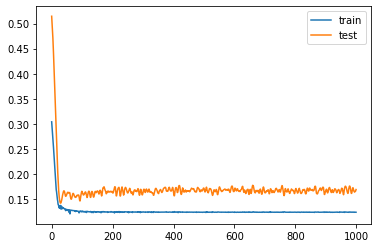

In [12]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [13]:

#tf.keras.models.save_model(model=model, filepath='tmp/modell')
#del model  # deletes the existing model
# returns a compiled model
# identical to the previous one
#model = tf.keras.models.load_model('tmp/noprodconsumfirstmonth1')
predicted = model.predict(testX)


In [14]:
print(testX.shape)
testXRe = testX.reshape(testX.shape[0],testX.shape[2])
predicted = predicted.reshape(-1,1)
print(predicted)
predicted = np.concatenate((testXRe[:,0:],predicted),axis=1)

(3, 1, 33)
[[0.4273221 ]
 [0.46225137]
 [0.47895986]]


In [15]:
predicted = scaler.inverse_transform(predicted)

In [16]:
testY = testY.reshape(len(testY),1)
testY = np.concatenate((testXRe[:,0:],testY),axis=1)
testY = scaler.inverse_transform(testY)

In [17]:
mean_predicted = np.mean(predicted[:,-1])
mean_test = np.mean(testY[:,-1])
print("MAE is: ",mean_absolute_error(testY[:,-1],predicted[:,-1]))
print("RMSE is: ",np.sqrt(mean_squared_error(testY[:,-1],predicted[:,-1])))
print(mean_test,mean_predicted)

MAE is:  36.07404
RMSE is:  36.24042
105.63556 69.561516


In [18]:
result = pd.concat([pd.Series(predicted[:,-1]),pd.Series(testY[:,-1])],axis=1)
result.columns = ['thetahat','theta']
result['diff'] = result['thetahat'] - result['theta']

In [19]:
result

,thetahat,theta,diff
0,67.354439,98.830002,-31.475563
1,70.026070,106.919998,-36.893929
2,71.304047,111.156670,-39.852623


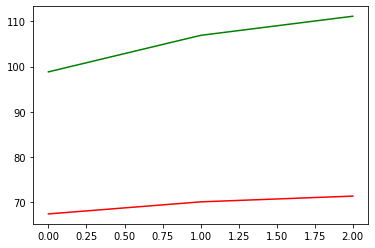

In [20]:
plt.plot(testY[:,-1],'g', predicted[:,-1], 'r')